# Thesis Data Analysis

## Contents:

**Chapter 2 - Assembly**
1. Coverage, all
1. Real assembly size using coverage
1. Embryophata buscos v1-4, post-pd and pre, incl with pd comparisons
1. Blast v1 low coverage
1. Buscos v1 short contigs
1. Decision not to move any purge_dups contigs
    
**Chapter 3 - TE Annotation**  
1. TE fragmentation
1. LTR time histogram
1. Stats on LTR identification

**Chapter 4 - Gene Annotation**  
1. BRAKER2 Results
1. Protien buscos
1. Protien QC: length and pi
1. Orthofinder species table
1. Orthofinder venn diagrams
1. GOtools Results

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import Bio
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import IsoelectricPoint as IP

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted, venn3, venn3_circles, venn3_unweighted

## Chapter 2 - Assembly

**Infiles:**

In [3]:
#v1
infn_v1_cov_contigs = '/home/jemimah/analysis/v1/coverage/20200427_v1_unscripted/20200427_v1_mergedPacbioNanopore_10mbNoOverlap.tab'
infn_v1_cov_1kb = '/home/jemimah/analysis/v1/coverage/20200427_v1_unscripted/20200427_v1_mergedPacbioNanopore_1kbNoOverlap.tab'
infn_v1_blast_best = "/home/jemimah/analysis/v1/blast.v1/Walli_nt.best_only.blastoutput"
infn_v1_busco_0402_em = '/home/jemimah/analysis/v1/busco/20200402/Walli.canu2.0.embryophyta_odb10/short_summary.specific.embryophyta_odb10.Walli.canu2.0.embryophyta_odb10.txt'
infn_v1_busco_0402_em_full = '/home/jemimah/analysis/v1/busco/20200402/Walli.canu2.0.embryophyta_odb10/run_embryophyta_odb10/full_table.tsv'

In [4]:
#v1_pd
infn_v1pd_cov_contigs = "/home/jemimah/analysis/v1/coverage/20200513_v1_pd_unscripted/20200514_pd_both_mergedPacbioNanopore_10mbNoOverlap.tab"
#infn_v1pri_cov_1kb = #didnt run it
infn_v1pd_busco_0615_em = "/home/jemimah/analysis/v1/busco/20200615/Walli.v1.purge_dups.embryophyta_odb10/short_summary.specific.embryophyta_odb10.Walli.v1.purge_dups.embryophyta_odb10.txt"
infn_v1pd_busco_0615_em_purged = "/home/jemimah/analysis/v1/busco/20200615/Walli.v1.purge_dups.embryophyta_odb10/run_embryophyta_odb10/all_buscos_assembly_sorting.tsv"


In [5]:
#v2 - pri and alt combined
infn_v2_cov_contigs = '/home/jemimah/analysis/hifiasm_assemblies/coverage/20200613_v2_merged/Walli.v2.ctg_combined_coverage.tab'
infn_v2_cov_1kb = '/home/jemimah/analysis/hifiasm_assemblies/coverage/20200613_v2_merged/Walli.v2.ctg_combined_1kb.tab'
infn_v2_busco_0615_em  = "/home/jemimah/analysis/hifiasm_assemblies/busco/20200615/Walli.v2.ctg_combined.embryophyta_odb10/short_summary.specific.embryophyta_odb10.Walli.v2.ctg_combined.embryophyta_odb10.txt"
infn_v2_busco_0615_em_purged  = "/home/jemimah/analysis/hifiasm_assemblies/busco/20200615/Walli.v2.ctg_combined.embryophyta_odb10/run_embryophyta_odb10/all_buscos_assembly_sorting.tsv"

In [6]:
#v3
infn_v3_cov_contigs = '/home/jemimah/analysis/v3/coverage/20200602_v3_merged_scripted/Walli.v3.contigs.fasta_coverage.tab'
infn_v3_cov_1kb = '/home/jemimah/analysis/v3/coverage/20200603_v3_merged_1kb/20200604_v3_merged_1kbNoOverlap.tab'
infn_v3_busco_0527_em = '/home/jemimah/analysis/v3/busco/20200527/Walli.v3.canu2.0.embryophyta_odb10/short_summary.specific.embryophyta_odb10.Walli.v3.canu2.0.embryophyta_odb10.txt'
infn_v3_busco_0602_eu_purged = "/home/jemimah/analysis/v3/busco/20200602/Walli.v3.purge_dups.eudicots_odb10/run_eudicots_odb10/all_buscos_assembly_sorting.tsv"
infn_v3_busco_0602_eu_full = "/home/jemimah/analysis/v3/busco/20200602/Walli.v3.purge_dups.eudicots_odb10/run_eudicots_odb10/full_table.tsv"


In [7]:
#v3_pd
infn_v3pd_cov_contigs = '/home/jemimah/analysis/v3/coverage/20200604_v3_purged_merged_scripted/Walli.v3.contigs.purge_dups_coverage.tab'
infn_v3pd_cov_1kb = '/home/jemimah/analysis/v3/coverage/20200604_v3_purged_merged_scripted_1kb/Walli.v3.contigs.purge_dups.1kbNoOverlap.tab'
infn_v3pd_busco_0615_em = "/home/jemimah/analysis/v3/busco/20200615/Walli.v3.purge_dups.embryophyta_odb10/short_summary.specific.embryophyta_odb10.Walli.v3.purge_dups.embryophyta_odb10.txt"
infn_v3pd_busco_0615_em_purged = "/home/jemimah/analysis/v3/busco/20200615/Walli.v3.purge_dups.embryophyta_odb10/run_embryophyta_odb10/all_buscos_assembly_sorting.tsv"

In [8]:
#v4 - pri and alt combined
infn_v4_cov_contigs = '/home/jemimah/analysis/hifiasm_assemblies/coverage/20200611_v4_merged/Walli.v4.ctg_combined_coverage.tab'
infn_v4_cov_1kb = '/home/jemimah/analysis/hifiasm_assemblies/coverage/20200611_v4_merged/Walli.v4.ctg_combined_1kb.tab'
infn_v4_busco_0615_em  = "/home/jemimah/analysis/hifiasm_assemblies/busco/20200615/Walli.v4.ctg_combined.embryophyta_odb10/short_summary.specific.embryophyta_odb10.Walli.v4.ctg_combined.embryophyta_odb10.txt"
infn_v4_busco_0615_em_purged  = "/home/jemimah/analysis/hifiasm_assemblies/busco/20200615/Walli.v4.ctg_combined.embryophyta_odb10/run_embryophyta_odb10/all_buscos_assembly_sorting.tsv"

### Coverage All

In [9]:
cov_header = ['contig', 'start', 'stop', 'cov']

In [10]:
cov_infn_dict = {"v1_1kb":infn_v1_cov_1kb,
           "v1_tig":infn_v1_cov_contigs,
           "v2_1kb":infn_v2_cov_1kb,
           "v2_tig":infn_v2_cov_contigs,
           "v3_1kb":infn_v3_cov_1kb,
           "v3_tig":infn_v3_cov_contigs,
#           "v3pd_1kb":infn_v3pd_cov_1kb,
#           "v3pd_tig":infn_v3pd_cov_contigs,
           "v4_1kb":infn_v4_cov_1kb,
           "v4_tig":infn_v4_cov_contigs}

cov_infn_pd_dict = {"v1_1kb":infn_v1_cov_1kb,#this is NOT pd
           "v1pd_tig":infn_v1pd_cov_contigs,
           "v2_1kb":infn_v2_cov_1kb,
           "v2_tig":infn_v2_cov_contigs,
           "v3pd_1kb":infn_v3pd_cov_1kb,
           "v3pd_tig":infn_v3pd_cov_contigs,
           "v4_1kb":infn_v4_cov_1kb,
           "v4_tig":infn_v4_cov_contigs}

In [11]:
cov_df_dict = {"1kb":{}, "Contigs":{}}
for x in cov_infn_dict:
    temp_df = pd.read_csv(cov_infn_dict[x], sep='\t', header=None, names=cov_header)
    temp_df['size'] = temp_df['stop'] - temp_df['start']
    temp_df['norm_cov'] = temp_df['cov']/temp_df['size']
    if x[-3:] == "1kb":
        cov_df_dict["1kb"][x] = temp_df
    elif x[-3:] == "tig":
        cov_df_dict["Contigs"][x] = temp_df
    else:
        print("formatting error")

In [12]:
#y = cov_df_dict["1kb"]
#for x in y:
#    sub_df = y[x][y[x]['norm_cov'] < 100]
#    plt.figure() #decides if on one table or not
#    plt.hist(sub_df["norm_cov"], bins= 100)
#    plt.xlim(0,100)
#    plt.xlabel("Normalised Coverage")
#    plt.ylabel("Frequency")
#    plt.title(x + ' histogram')

In [13]:
#makes a df with a column of norm_cov for each v
#norm_cov_1kb = []
#norm_cov_1kb_headers = [] 
#for x in cov_df_dict["1kb"]:
#    norm_cov_1kb += [cov_df_dict["1kb"][x]["norm_cov"]]
#    norm_cov_1kb_headers += [(x[:2])]
    
#norm_cov_1kb_df = pd.concat(norm_cov_1kb, axis=1, keys=norm_cov_1kb_headers)

In [14]:
assembly_dict = {"v1": 'v1 (Canu all reads)', 
                 "v2": 'v2 (Hifiasm all reads)',
                 "v3": "v3 (Canu filtered reads)",
                 "v4": "v4 (Hifiasm filtered reads)"}

In [15]:
for x in cov_df_dict["1kb"]:
    print(x)

v1_1kb
v2_1kb
v3_1kb
v4_1kb


In [16]:
paths_1kb_cov = []
for x in cov_df_dict["1kb"]:
    cov_df_dict["1kb"][x]["Assembly"] = assembly_dict[x[:2]]
    paths_1kb_cov += [cov_df_dict["1kb"][x]]
norm_cov_1kb_df = pd.concat(paths_1kb_cov, ignore_index=True)
norm_cov_1kb_df_subset = norm_cov_1kb_df[norm_cov_1kb_df["norm_cov"] < 100]

In [17]:
#sns.displot(norm_cov_1kb_df_subset, x="norm_cov", hue="assembly", bins=100)

In [18]:
norm_cov_1kb_df

,contig,start,stop,cov,size,norm_cov,Assembly
0,tig00000001,0,1000,6476,1000,6.476,v1 (Canu all reads)
1,tig00000001,1000,2000,10587,1000,10.587,v1 (Canu all reads)
2,tig00000001,2000,3000,12302,1000,12.302,v1 (Canu all reads)
3,tig00000001,3000,4000,14911,1000,14.911,v1 (Canu all reads)
4,tig00000001,4000,5000,16565,1000,16.565,v1 (Canu all reads)
...,...,...,...,...,...,...,...
6320934,a_ctg006589,7000,8000,1000,1000,1.000,v4 (Hifiasm filtered reads)
6320935,a_ctg006589,8000,9000,1000,1000,1.000,v4 (Hifiasm filtered reads)
6320936,a_ctg006589,9000,10000,1000,1000,1.000,v4 (Hifiasm filtered reads)
6320937,a_ctg006589,10000,11000,1000,1000,1.000,v4 (Hifiasm filtered reads)


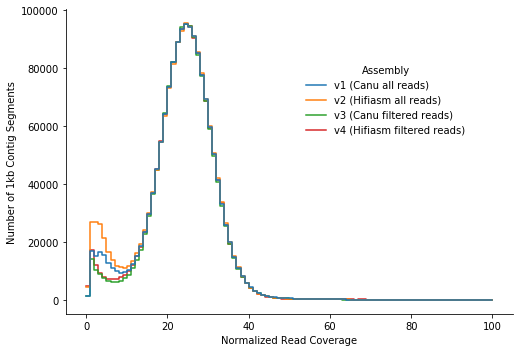

In [21]:
g = sns.displot(norm_cov_1kb_df_subset, x="norm_cov", hue="Assembly", bins=100, 
            element="step", fill =False)
plt.xlabel("Normalized Read Coverage")
plt.ylabel("Number of 1kb Contig Segments")
g.legend.set_bbox_to_anchor((.9, .7))

plt.tight_layout()
#plt.savefig('Thesis_images/coverage_old.svg')

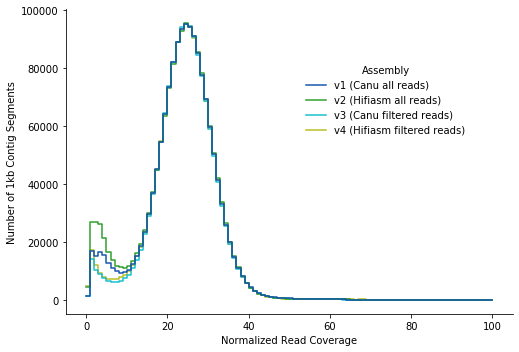

In [22]:
c_list = sns.color_palette("tab10").as_hex()
coverage_palette = ["#1655AC"] + [c_list[i] for i in [2, -1, -2]] 

g = sns.displot(norm_cov_1kb_df_subset, x="norm_cov", hue="Assembly", bins=100, 
            element="step", fill =False,
            palette=coverage_palette)
plt.xlabel("Normalized Read Coverage")
plt.ylabel("Number of 1kb Contig Segments")
g.legend.set_bbox_to_anchor((.9, .7))

plt.tight_layout()
#plt.savefig('Thesis_images/coverage.svg')

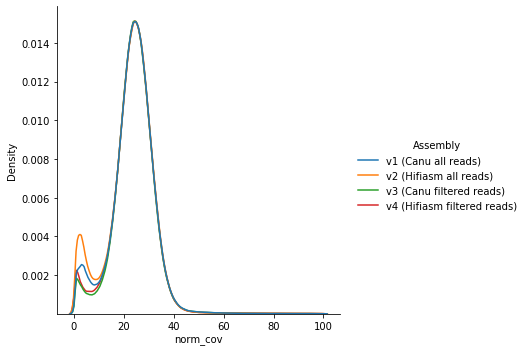

In [23]:
sns.displot(norm_cov_1kb_df_subset, x="norm_cov", hue="Assembly", 
            kind="kde")

Things to try:  
element="step"  
common_norm=False  
looking at: https://seaborn.pydata.org/tutorial/distributions.html

In [24]:
#y = cov_df_dict["Contigs"]
#for x in y:
#    sub_df = y[x][y[x]['norm_cov'] < 5]
##    plt.figure() #decides if on one table or not
##    plt.scatter(y[x]['size'], y[x]['norm_cov'])
#    plt.scatter(sub_df['size'], sub_df['norm_cov'])
#    plt.ylabel("Normalised Coverage")
#    plt.xlabel("size")
##    plt.title(x + ' histogram')
#    plt.title('coverage vs size')

In [25]:
paths_tig_cov = []
for x in cov_df_dict["Contigs"]:
    cov_df_dict["Contigs"][x]["assembly"] = (x[:2])
    paths_tig_cov += [cov_df_dict["Contigs"][x]]
norm_cov_tig_df = pd.concat(paths_tig_cov, ignore_index=True)
low_cov = norm_cov_tig_df[norm_cov_tig_df['norm_cov'] < 5]

Text(0.5, 1.0, 'coverage vs size')

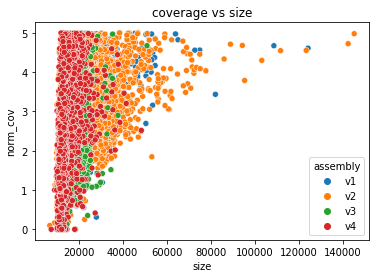

In [26]:
sns.scatterplot(data=low_cov, x="size", y="norm_cov", 
                hue="assembly").set_title('coverage vs size')

In [27]:
#gotta fix it

In [28]:
1477/1568 *100

94.19642857142857

### Standard deviation

In [29]:
cov_df_pd_dict = {"1kb":{}, "Contigs":{}}
for x in cov_infn_pd_dict:
    temp_df = pd.read_csv(cov_infn_pd_dict[x], sep='\t', header=None, names=cov_header)
    temp_df['size'] = temp_df['stop'] - temp_df['start']
    temp_df['norm_cov'] = temp_df['cov']/temp_df['size']
    if x[-3:] == "1kb":
        cov_df_pd_dict["1kb"][x] = temp_df
    elif x[-3:] == "tig":
        cov_df_pd_dict["Contigs"][x] = temp_df
    else:
        print("formatting error")

In [30]:
for x in cov_df_pd_dict["Contigs"]:
    temp = cov_df_pd_dict["Contigs"][x]
    pri = temp[~(temp["contig"].str.contains("a_") | temp["contig"].str.contains("hap_"))]
    std = round(temp.std(axis=0)["size"])
    max_all = temp["size"].max()
    min_all = temp["size"].min()
    pri_std = round(pri.std(axis=0)["size"])
    print(x, std, max_all, min_all, pri_std)

v1pd_tig 378600.0 7591370 10722 562727.0
v2_tig 377936.0 7704129 6959 513247.0
v3pd_tig 410962.0 7200363 10722 671505.0
v4_tig 423257.0 8151415 7594 683892.0


Why are they so big???

In [31]:
paths_contig_length = []
for x in cov_df_pd_dict["Contigs"]:
    cov_df_pd_dict["Contigs"][x]["Assembly"] = assembly_dict[x[:2]]
    paths_contig_length += [cov_df_pd_dict["Contigs"][x]]
contig_length_df = pd.concat(paths_contig_length, ignore_index=True)
#norm_cov_1kb_df_subset = contig_length_df[contig_length_df["norm_cov"] < 100]

In [32]:
contig_length_df

,contig,start,stop,cov,size,norm_cov,Assembly
0,tig00000001,0,7200360,299826198,7200360,41.640445,v1 (Canu all reads)
1,tig00000081,0,7591370,359628169,7591370,47.373290,v1 (Canu all reads)
2,tig00000157,0,19887,5253025,19887,264.143662,v1 (Canu all reads)
3,tig00000163,0,27445,19877858,27445,724.279760,v1 (Canu all reads)
4,tig00000166,0,4398111,131502889,4398111,29.899857,v1 (Canu all reads)
...,...,...,...,...,...,...,...
39482,a_ctg006585,0,11362,11739,11362,1.033181,v4 (Hifiasm filtered reads)
39483,a_ctg006586,0,11725,23322,11725,1.989083,v4 (Hifiasm filtered reads)
39484,a_ctg006587,0,11149,19787,11149,1.774778,v4 (Hifiasm filtered reads)
39485,a_ctg006588,0,12159,27745,12159,2.281849,v4 (Hifiasm filtered reads)


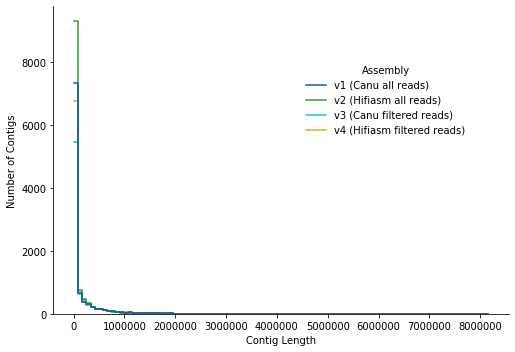

In [33]:
g = sns.displot(contig_length_df, x="size", hue="Assembly", bins=100, 
            element="step", fill =False,
            palette=coverage_palette)
plt.xlabel("Contig Length")
plt.ylabel("Number of Contigs")
g.legend.set_bbox_to_anchor((.9, .7))
plt.tight_layout()

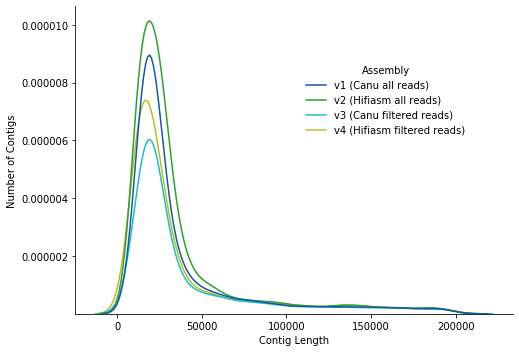

In [34]:
g = sns.displot(contig_length_df[contig_length_df["size"]<200000], x="size", hue="Assembly", 
             kind="kde",
            palette=coverage_palette)
plt.xlabel("Contig Length")
plt.ylabel("Number of Contigs")
g.legend.set_bbox_to_anchor((.9, .7))
plt.tight_layout()

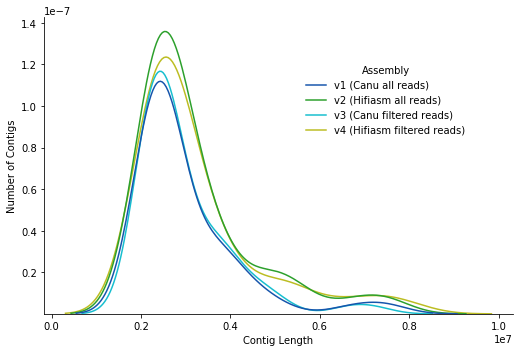

In [35]:
g = sns.displot(contig_length_df[contig_length_df["size"]> 2000000], x="size", hue="Assembly", 
             kind="kde",
            palette=coverage_palette)
plt.xlabel("Contig Length")
plt.ylabel("Number of Contigs")
g.legend.set_bbox_to_anchor((.9, .7))
plt.tight_layout()

### Real Assembly Size using coverage

In [36]:
for category in cov_df_dict:
    for label in cov_df_dict[category]:
        temp_df = cov_df_dict[category][label]
        mean_cov = temp_df["norm_cov"].mean()
        temp_df["true_length"] = ((temp_df["size"]*temp_df["norm_cov"])/mean_cov)

In [37]:
filling = {"categories": ["total_size", "true_contig", "true_1kb"]}
for label in cov_df_dict["Contigs"]:
        filling[(label[:2])] = [cov_df_dict["Contigs"][label]["size"].sum(),
                               str(round(cov_df_dict["Contigs"][label]["true_length"].sum())),
                               str(round(cov_df_dict["1kb"][(label[:2]) + "_1kb"]["true_length"].sum()))]
true_lengths_df = pd.DataFrame.from_dict(filling, dtype=object).set_index("categories")
true_lengths_df

,v1,v2,v3,v4
categories,,,,
total_size,1580976228,1643170065,1523641891,1553445906
true_contig,1806550653.0,1850067208.0,1628312530.0,1486567685.0
true_1kb,1584600320.0,1647694662.0,1526608511.0,1556852731.0


### BUSCOs Embryophata v1-v4

Note: this dataset is post-pd for v1 and v3, and combines both pri and alt assembies for ALL v1-v4

**Both pri and alt at once**

In [38]:
def to_percents(temp_both):
    temp_percents = ((temp_both/temp_both.loc["Total BUSCO groups searched"])*100).round(2)
    rename_percents = temp_percents.rename(index=lambda s: s + "%")
    df_both_percents = temp_both[:1].append(rename_percents[1:])
    return df_both_percents

In [39]:
name1 = "v1pd"
name2 = "v2comb"
name3 = "v3pd"
name4 = "v4comb"
name1_pre_pd = "v1pre"
name3_pre_pd = "v3pre"

In [40]:
em_samples = {name1:infn_v1pd_busco_0615_em, name2:infn_v2_busco_0615_em, 
              name3:infn_v3pd_busco_0615_em, name4:infn_v4_busco_0615_em,
              name1_pre_pd:infn_v1_busco_0402_em, name3_pre_pd:infn_v3_busco_0527_em}

In [41]:
busco_df_em = pd.DataFrame()
for v in em_samples:
    temp_header=[v, 'category']
    temp_df = pd.read_csv(em_samples[v], sep = '\t', header = None, skiprows = 8, usecols = [1, 2], names=temp_header)
    temp_df = temp_df.set_index("category")
    busco_df_em[v] = temp_df[v]

In [42]:
%%bash
cd ~/analysis/v1/busco/20200615/Walli.v1.purge_dups.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/
echo v1pd
for file in *.fna; do grep -c ">" $file; done | sort | uniq -c

cd /home/jemimah/analysis/hifiasm_assemblies/busco/20200615/Walli.v2.ctg_combined.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/
echo v2
for file in *.fna; do grep -c ">" $file; done | sort | uniq -c

cd /home/jemimah/analysis/v3/busco/20200615/Walli.v3.purge_dups.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/
echo v3pd
for file in *.fna; do grep -c ">" $file; done | sort | uniq -c

cd /home/jemimah/analysis/hifiasm_assemblies/busco/20200615/Walli.v4.ctg_combined.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/
echo v4
for file in *.fna; do grep -c ">" $file; done | sort | uniq -c

cd /home/jemimah/analysis/v1/busco/20200402/Walli.canu2.0.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/
echo v1
for file in *.fna; do grep -c ">" $file; done | sort | uniq -c

cd /home/jemimah/analysis/v3/busco/20200527/Walli.v3.canu2.0.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/
echo v3
for file in *.fna; do grep -c ">" $file; done | sort | uniq -c

v1pd
   1208 2
     70 3
      4 4
      4 5
v2
   1221 2
     64 3
      5 4
      2 5
v3pd
   1308 2
     67 3
      6 4
      4 5
      1 6
v4
   1328 2
     63 3
      6 4
      2 5
v1
   1204 2
     70 3
      4 4
      4 5
v3
   1308 2
     67 3
      6 4
      4 5
      1 6


In [43]:
# true duplicates:
#check infn/paths if any change
td_v1pd = !for fna in /home/jemimah/analysis/v1/busco/20200615/Walli.v1.purge_dups.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/*.fna; do grep -c ">" $fna; done | sort | uniq -c | head -1
td_v1pd = int(td_v1pd[0].split()[0])
td_v2 = !for fna in /home/jemimah/analysis/hifiasm_assemblies/busco/20200615/Walli.v2.ctg_combined.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/*.fna; do grep -c ">" $fna; done | sort | uniq -c | head -1
td_v2 = int(td_v2[0].split()[0])
td_v3pd = !for fna in /home/jemimah/analysis/v3/busco/20200615/Walli.v3.purge_dups.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/*.fna; do grep -c ">" $fna; done | sort | uniq -c | head -1
td_v3pd = int(td_v3pd[0].split()[0])
td_v4 = !for fna in /home/jemimah/analysis/hifiasm_assemblies/busco/20200615/Walli.v4.ctg_combined.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/*.fna; do grep -c ">" $fna; done | sort | uniq -c | head -1
td_v4 = int(td_v4[0].split()[0])
td_v1 = !for fna in /home/jemimah/analysis/v1/busco/20200402/Walli.canu2.0.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/*.fna; do grep -c ">" $fna; done | sort | uniq -c | head -1
td_v1 = int(td_v1[0].split()[0])
td_v3 = !for fna in /home/jemimah/analysis/v3/busco/20200527/Walli.v3.canu2.0.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/*.fna; do grep -c ">" $fna; done | sort | uniq -c | head -1
td_v3 = int(td_v3[0].split()[0])

In [44]:
true_duplicates_em = {'category': "Complete and two copy BUSCOs", name1:td_v1pd, name2:td_v2, name3:td_v3pd, name4:td_v4, name1_pre_pd:td_v1, name3_pre_pd:td_v3}
df_true_duplicates_em = pd.DataFrame.from_records([true_duplicates_em], index="category")
busco_df_em = busco_df_em[-1:].append(busco_df_em[:3].append(df_true_duplicates_em).append(busco_df_em[3:-1]))

In [45]:
print("Both pri and alt at once")
busco_df_em[[name1, name2, name3, name4]]

Both pri and alt at once


,v1pd,v2comb,v3pd,v4comb
category,,,,
Total BUSCO groups searched,1614,1614,1614,1614
Complete BUSCOs (C),1491,1482,1568,1557
Complete and single-copy BUSCOs (S),205,190,182,158
Complete and duplicated BUSCOs (D),1286,1292,1386,1399
Complete and two copy BUSCOs,1208,1221,1308,1328
Fragmented BUSCOs (F),8,10,5,10
Missing BUSCOs (M),115,122,41,47


In [46]:
1286-1208

78

In [47]:
for x in [name1, name2, name3, name4]:
    print(x)
    maths = busco_df_em.loc["Complete and duplicated BUSCOs (D)",x] - busco_df_em.loc["Complete and two copy BUSCOs",x]
    print(maths)
    print(maths/1614 *100)
    

v1pd
78
4.83271375464684
v2comb
71
4.39900867410161
v3pd
78
4.83271375464684
v4comb
71
4.39900867410161


In [48]:
11.8 + 75.6 + 4.4 + 0.6 + 7.6

99.99999999999999

**separating primary and alternate assemblies**

In [49]:
busco_heading = list(busco_df_em.index.values)
another_heading = busco_heading[:3] + ["Whole assembly single-copy BUSCOs"] + busco_heading[3:]

In [50]:
def make_dfs(purged_dict, total_buscos):
    both_dict = {'category': another_heading}

    for v in purged_dict:
        count_df = (pd.read_csv(purged_dict[v], sep = '\t')).set_index("Busco_id")

        total = total_buscos  
        f = len(count_df[count_df["pri_status"].str.contains("Frag")])  
#        c = len(count_df[count_df["primary_count"] > 0])
        s = len(count_df[count_df["primary_count"] == 1 & (count_df["pri_status"].str.contains("Frag") == False)])
        d = len(count_df[count_df['primary_count'] > 1])
        c = s + d
        two = len(count_df[count_df['primary_count'] == 2])
        one = len(count_df[count_df['pri_status'].str.contains("Complete")])
        m = total - (c+f) 

        fa = len(count_df[count_df["alt_status"].str.contains("Frag")])  
#        ca = len(count_df[count_df["alternate_count"] > 0])
        sa = len(count_df[count_df["alternate_count"] == 1 & (count_df["alt_status"].str.contains("Frag") == False)])
        da = len(count_df[count_df['alternate_count'] > 1])
        ca = sa + da
        twoa = len(count_df[count_df['alternate_count'] == 2])
        onea = len(count_df[count_df['alt_status'].str.contains("Complete")])
        ma = total - (ca+fa) 


        list_pri = [total,c ,s ,one ,d ,two ,f ,m]
        list_alt = [total,ca,sa,onea,da,twoa,fa,ma]
        both_dict[v + "_pri"] = list_pri
        both_dict[v + "_alt"] = list_alt


    df_both = pd.DataFrame(both_dict)
    df_both = df_both.set_index("category")
    return df_both

In [51]:
em_samples_purged = {name1: infn_v1pd_busco_0615_em_purged, name2: infn_v2_busco_0615_em_purged, name3: infn_v3pd_busco_0615_em_purged, name4: infn_v4_busco_0615_em_purged}

In [52]:
df_both_em = make_dfs(em_samples_purged, 1614)

In [53]:
print("just primary assembly")
df_pri_em = df_both_em[["v1pd_pri","v2comb_pri","v3pd_pri","v4comb_pri"]]
df_pri_em

just primary assembly


,v1pd_pri,v2comb_pri,v3pd_pri,v4comb_pri
category,,,,
Total BUSCO groups searched,1614,1614,1614,1614
Complete BUSCOs (C),1397,1384,1477,1465
Complete and single-copy BUSCOs (S),1189,1312,1288,1422
Whole assembly single-copy BUSCOs,122,111,104,85
Complete and duplicated BUSCOs (D),208,72,189,43
Complete and two copy BUSCOs,200,62,183,42
Fragmented BUSCOs (F),3,6,2,5
Missing BUSCOs (M),214,224,135,144


In [54]:
1470 - 1422

48

In [55]:
to_percents(df_pri_em)

,v1pd_pri,v2comb_pri,v3pd_pri,v4comb_pri
category,,,,
Total BUSCO groups searched,1614.00,1614.00,1614.00,1614.00
Complete BUSCOs (C)%,86.56,85.75,91.51,90.77
Complete and single-copy BUSCOs (S)%,73.67,81.29,79.80,88.10
Whole assembly single-copy BUSCOs%,7.56,6.88,6.44,5.27
Complete and duplicated BUSCOs (D)%,12.89,4.46,11.71,2.66
Complete and two copy BUSCOs%,12.39,3.84,11.34,2.60
Fragmented BUSCOs (F)%,0.19,0.37,0.12,0.31
Missing BUSCOs (M)%,13.26,13.88,8.36,8.92


**How to do the dup and sep for one assembly**

In [56]:
df_em_v3_only = busco_df_em[[name3_pre_pd, name3]].copy()
df_em_v3_only["v3_pri"] = df_both_em[(name3+"_pri")]
df_em_v3_only["v3_alt"] = df_both_em[(name3+"_alt")]
print("v3 assembly")
df_em_v3_only

v3 assembly


,v3pre,v3pd,v3_pri,v3_alt
category,,,,
Total BUSCO groups searched,1614,1614,1614,1614
Complete BUSCOs (C),1568,1568,1477,1296
Complete and single-copy BUSCOs (S),182,182,1288,1226
Complete and duplicated BUSCOs (D),1386,1386,189,70
Complete and two copy BUSCOs,1308,1308,183,62
Fragmented BUSCOs (F),5,5,2,3
Missing BUSCOs (M),41,41,135,315


In [57]:
busco_df_em.columns

Index(['v1pd', 'v2comb', 'v3pd', 'v4comb', 'v1pre', 'v3pre'], dtype='object')

In [58]:
df_both_em.columns

Index(['v1pd_pri', 'v1pd_alt', 'v2comb_pri', 'v2comb_alt', 'v3pd_pri',
       'v3pd_alt', 'v4comb_pri', 'v4comb_alt'],
      dtype='object')

In [59]:
#for making the r graphs
r_species = ["v3pd", 'v4comb_pri', 'v1pd', 'v3pd_pri', 'v2comb', 'v2comb_pri', 'v1pd_pri', 'v4comb']
list_1 = ['Complete and single-copy BUSCOs (S)', 'Complete and two copy BUSCOs','Fragmented BUSCOs (F)', 'Missing BUSCOs (M)']
percents = []
values = []
for r in r_species:
    temp = []
    if "_" in r:
        for y in list_1:
            temp += [df_both_em.loc[y,r]]
        temp = temp[:2] + [(df_both_em.loc['Complete and duplicated BUSCOs (D)',r] - df_both_em.loc['Complete and two copy BUSCOs',r])] + temp[2:]
    else:
        for y in list_1:
            temp += [busco_df_em.loc[y,r]]
        temp = temp[:2] + [(busco_df_em.loc['Complete and duplicated BUSCOs (D)',r] - busco_df_em.loc['Complete and two copy BUSCOs',r])] + temp[2:]
    values += temp
    for a in temp:
        percents += [round(a/1614 *100,1)]
    print(r, sum(temp))
print(values)
print(percents)

v3pd 1614
v4comb_pri 1614
v1pd 1614
v3pd_pri 1614
v2comb 1614
v2comb_pri 1614
v1pd_pri 1614
v4comb 1614
[182, 1308, 78, 5, 41, 1422, 42, 1, 5, 144, 205, 1208, 78, 8, 115, 1288, 183, 6, 2, 135, 190, 1221, 71, 10, 122, 1312, 62, 10, 6, 224, 1189, 200, 8, 3, 214, 158, 1328, 71, 10, 47]
[11.3, 81.0, 4.8, 0.3, 2.5, 88.1, 2.6, 0.1, 0.3, 8.9, 12.7, 74.8, 4.8, 0.5, 7.1, 79.8, 11.3, 0.4, 0.1, 8.4, 11.8, 75.7, 4.4, 0.6, 7.6, 81.3, 3.8, 0.6, 0.4, 13.9, 73.7, 12.4, 0.5, 0.2, 13.3, 9.8, 82.3, 4.4, 0.6, 2.9]


In [60]:
#for making the r graphs
list_ = ['Complete and single-copy BUSCOs (S)', 'Complete and two copy BUSCOs','Fragmented BUSCOs (F)', 'Missing BUSCOs (M)']

for x in df_em_v3_only[["v3pd","v3_pri","v3_alt"]]:
    temp = []
    perc = []
    for y in list_:
        temp += [df_em_v3_only.loc[y,x]]
    temp = temp[:2] + [(df_em_v3_only.loc['Complete and duplicated BUSCOs (D)',x] - df_em_v3_only.loc['Complete and two copy BUSCOs',x])] + temp[2:]
    for a in temp:
        perc += [round(a/1614 *100,1)]
    print(temp)
    print(sum(temp))
    #print(perc)
    #print(sum(perc))

[182, 1308, 78, 5, 41]
1614
[1288, 183, 6, 2, 135]
1614
[1226, 62, 8, 3, 315]
1614


In [61]:
busco_df_em[[name1, name3]]

,v1pd,v3pd
category,,
Total BUSCO groups searched,1614,1614
Complete BUSCOs (C),1491,1568
Complete and single-copy BUSCOs (S),205,182
Complete and duplicated BUSCOs (D),1286,1386
Complete and two copy BUSCOs,1208,1308
Fragmented BUSCOs (F),8,5
Missing BUSCOs (M),115,41


In [62]:
df_em_v3_only.index

Index(['Total BUSCO groups searched', 'Complete BUSCOs (C)',
       'Complete and single-copy BUSCOs (S)',
       'Complete and duplicated BUSCOs (D)', 'Complete and two copy BUSCOs',
       'Fragmented BUSCOs (F)', 'Missing BUSCOs (M)'],
      dtype='object', name='category')

### Blast v1 low coverage

In [63]:
blastdf = pd.read_csv(infn_v1_blast_best, sep='\t', header=None)

In [64]:
blastdf.groupby(12).count()[14]

12
Bacteria     1533
Eukaryota    7095
Viruses         6
Name: 14, dtype: int64

In [65]:
##pull out low coverage contigs names
v1_cov_tig_low_names = cov_df_dict["Contigs"]["v1_tig"][cov_df_dict["Contigs"]["v1_tig"]['norm_cov'] < 5].contig.tolist()
len(v1_cov_tig_low_names)

2597

In [66]:
#fractions for total 
blastdf.groupby(12).count()[14]/blastdf.groupby(12).count()[14].sum()

12
Bacteria     0.177554
Eukaryota    0.821751
Viruses      0.000695
Name: 14, dtype: float64

In [67]:
#fraction for subset
blastdf[blastdf[0].isin(v1_cov_tig_low_names)].groupby(12).count()[14]/blastdf[blastdf[0].isin(v1_cov_tig_low_names)].groupby(12).count()[14].sum()

12
Bacteria     0.342882
Eukaryota    0.657118
Name: 14, dtype: float64

Takeaway point: there is a higher proportion of bacterial blast hits in the low coverage contigs than generally (almost double as frequent). 

### blast v1 graph

In [68]:
inblobfn_v1 = '/home/jemimah/analysis/v1/blobplot/v1_blastTop10.blobDB.table.txt'
blobheader = "name	length	GC	N	bam0	phylum.t.6%s	phylum.s.7%s	phylum.c.8".split("\t")
blobdf_v1 = pd.read_csv(inblobfn_v1, sep='\t', header=None, names = blobheader,  comment = '#')

In [69]:
sizes = blobdf_v1.pivot_table(index=["phylum.t.6%s"], aggfunc='size').to_dict()
new_names = {}
new_sizes = sizes.copy()
count = 0
others = []
for x in sizes:
    if sizes[x] > 30:
        name =  x + " (" + str(sizes[x]) + ")"
        new_names[x] = name
        new_sizes[name] = sizes[x]
    else:
        count += sizes[x]
        others += [x]

for x in others:
    new_names[x] = "other (" + str(count) + ")"
new_sizes["other (" + str(count) + ")"] = count

In [70]:
blobdf_v1["Phylum"] = blobdf_v1["phylum.t.6%s"].map(new_names)
blobdf_v1["Phylum_count"] = blobdf_v1["Phylum"].map(new_sizes)
blobdf_v1.sort_values("Phylum_count", ascending=False, inplace=True)

In [71]:
blobdf_v1["coverage"] = np.log10(blobdf_v1["bam0"])

/home/jemimah/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


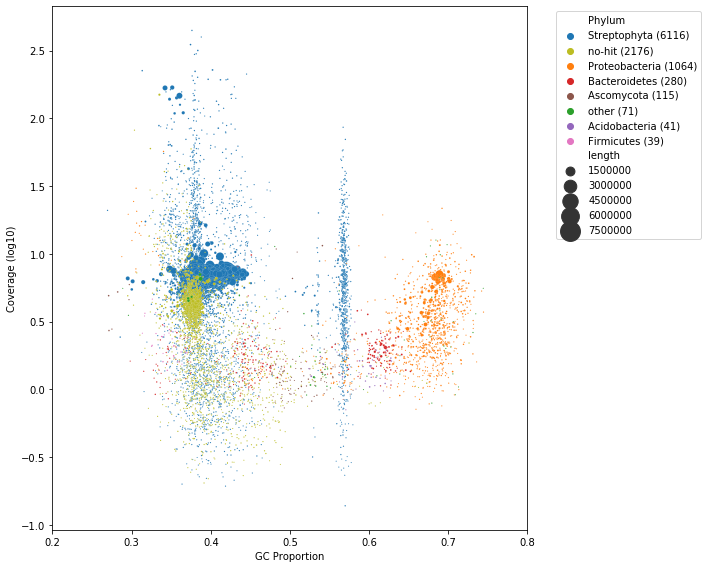

In [72]:
c_list = sns.color_palette("tab10").as_hex()
blob_v1_palette = [c_list[i] for i in [0, -2, 1, 3, 5, 2, 4, 6]] 

plt.figure(figsize=(10,8))
sns.scatterplot(data=blobdf_v1, x="GC", y="coverage", 
                hue="Phylum", size="length",
                sizes=(1, 400), 
                palette=blob_v1_palette)

plt.xlim(0.2, 0.8)
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

plt.ylabel("Coverage (log10)")
plt.xlabel("GC Proportion")
plt.tight_layout()
#plt.savefig('Thesis_images/blast_v1.png')

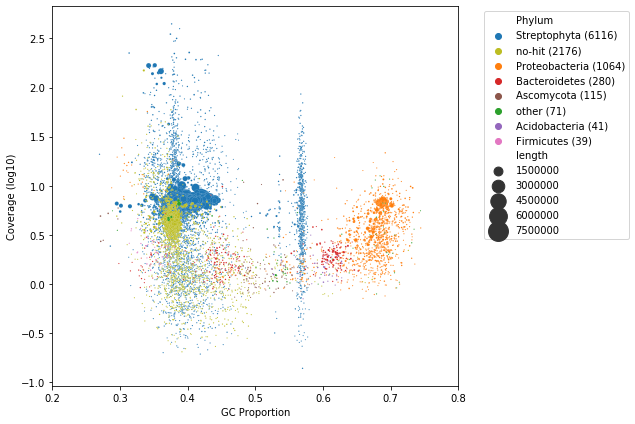

In [73]:
c_list = sns.color_palette("tab10").as_hex()
blob_v1_palette = [c_list[i] for i in [0, -2, 1, 3, 5, 2, 4, 6]] 

plt.figure(figsize=(9,6))
sns.scatterplot(data=blobdf_v1, x="GC", y="coverage", 
                hue="Phylum", size="length",
                sizes=(1, 400), 
                palette=blob_v1_palette)

plt.xlim(0.2, 0.8)
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

plt.ylabel("Coverage (log10)")
plt.xlabel("GC Proportion")
plt.tight_layout()
#plt.savefig('Thesis_images/blast_v1.png')

In [74]:
inblobfn_v3 = '/home/jemimah/analysis/v3/blobplot/v3_blastTop10.blobDB.table.txt'
blobheader = "name	length	GC	N	bam0	phylum.t.6%s	phylum.s.7%s	phylum.c.8".split("\t")
blobdf_v3 = pd.read_csv(inblobfn_v3, sep='\t', header=None, names = blobheader,  comment = '#')

In [75]:
sizes = blobdf_v3.pivot_table(index=["phylum.t.6%s"], aggfunc='size').to_dict()
new_names = {}
new_sizes = sizes.copy()
count = 0
others = []
for x in sizes:
    if sizes[x] > 30:
        name =  x + " (" + str(sizes[x]) + ")"
        new_names[x] = name
        new_sizes[name] = sizes[x]
    else:
        count += sizes[x]
        others += [x]

for x in others:
    new_names[x] = "other (" + str(count) + ")"
new_sizes["other (" + str(count) + ")"] = count

In [76]:
blobdf_v3["Phylum"] = blobdf_v3["phylum.t.6%s"].map(new_names)
blobdf_v3["Phylum_count"] = blobdf_v3["Phylum"].map(new_sizes)
blobdf_v3.sort_values("Phylum_count", ascending=False, inplace=True)
blobdf_v3["coverage"] = np.log10(blobdf_v3["bam0"])

/home/jemimah/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


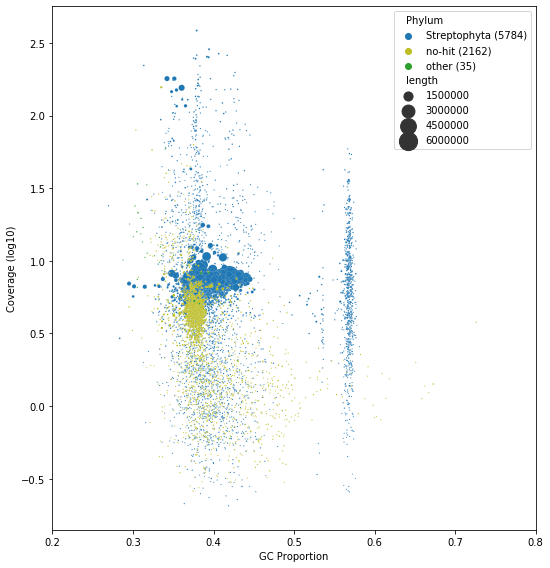

In [77]:
c_list = sns.color_palette("tab10").as_hex()
blob_v3_palette = [c_list[i] for i in [0, -2, 2,]] 

plt.figure(figsize=(7.75,8))
sns.scatterplot(data=blobdf_v3, x="GC", y="coverage", 
                hue="Phylum", size="length",
                sizes=(1, 400), palette=blob_v3_palette)
plt.xlim(0.2, 0.8)
plt.ylabel("Coverage (log10)")
plt.xlabel("GC Proportion")
plt.tight_layout()
#plt.savefig('Thesis_images/blast_v3.png')

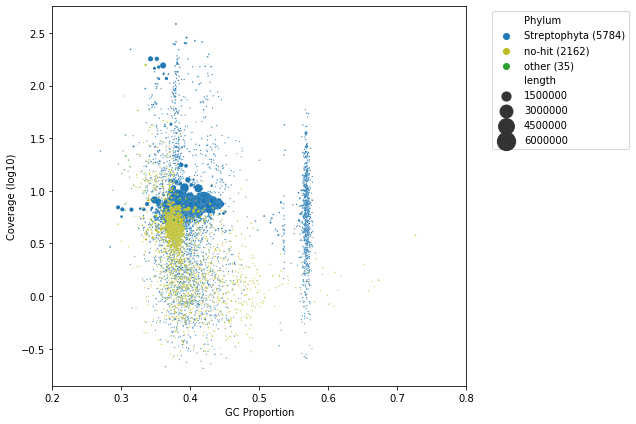

In [78]:
c_list = sns.color_palette("tab10").as_hex()
blob_v3_palette = [c_list[i] for i in [0, -2, 2,]] 

plt.figure(figsize=(9,6))
sns.scatterplot(data=blobdf_v3, x="GC", y="coverage", 
                hue="Phylum", size="length",
                sizes=(1, 400), palette=blob_v3_palette)
plt.xlim(0.2, 0.8)
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))

plt.ylabel("Coverage (log10)")
plt.xlabel("GC Proportion")
plt.tight_layout()
#plt.savefig('Thesis_images/blast_v3.png')

### Buscos v1 short contigs

In [79]:
busco_header = ['Busco_id', 'Status', 'Sequence', 'Gene_Start', 'Gene_End', 'Score', 'Length', 'OrthoDB_url', 'Description']

In [80]:
busco_df = pd.read_csv(infn_v1_busco_0402_em_full, sep = '\t', header = None, names=busco_header, comment = '#')
busco_df = busco_df[busco_df.Status != 'Missing']

In [81]:
#total number of busco hits
busco_df.shape[0]

2873

In [82]:
v1_cov_con = cov_df_dict["Contigs"]["v1_tig"]
print("total number of busco hits:", busco_df.shape[0])
print("number of buscos on low cov: ", busco_df[busco_df.Sequence.isin(v1_cov_tig_low_names)].shape[0])
print("chance of a random contig to have a busco:", busco_df.shape[0]/v1_cov_con.shape[0]) # number busco / number contig
print("chance of a low cov contig to have busco: ", busco_df[busco_df.Sequence.isin(v1_cov_tig_low_names)].shape[0]/len(v1_cov_tig_low_names)) # number busco on low cov / number low contigs
print("chance of busco being both low coverage and having busco:", busco_df[busco_df.Sequence.isin(v1_cov_tig_low_names)].shape[0]/v1_cov_con.shape[0]) # number busco on low cov / number contigs total

total number of busco hits: 2873
number of buscos on low cov:  65
chance of a random contig to have a busco: 0.290143405372652
chance of a low cov contig to have busco:  0.02502887947631883
chance of busco being both low coverage and having busco: 0.0065643304382952935


So we can be comfortable excluding those low cov contigs as non-useful

### Decision to not move any purge_dups contigs

We want to identify buscos which are complete in the alternate assembly and not present in the primary assembly.  

In [83]:
buscoseq_df = pd.read_csv(infn_v3_busco_0602_eu_purged, sep = '\t')
pri_missing_df = buscoseq_df[buscoseq_df["primary_count"] == 0]

In [84]:
alt_1 = pri_missing_df[pri_missing_df["alternate_count"] == 1]
alt_1_list = []

for x in alt_1["alternate_seqs"].unique():
    y = x.split("'")
    alt_1_list += [y[1]]
    
len(alt_1_list)

114

In [85]:
eudicot_header = "Busco_id      Status  Sequence        Gene_Start      Gene_End        Score   Length".split()
buscoseq_df = pd.read_csv(infn_v3_busco_0602_eu_full, sep = '\t', header = None, names=eudicot_header, comment = "#")

In [86]:
#if sequence is in tigs_2 remove hap_
buscoseq_df_updated = buscoseq_df.copy()
print(len(buscoseq_df[(buscoseq_df["Status"] != "Missing") & (buscoseq_df["Sequence"].str.contains("hap_"))]))
list_ = alt_1_list
for x in list_:
    buscoseq_df_updated.replace(to_replace= x, value= x[4:], inplace=True)

print(len(buscoseq_df_updated[(buscoseq_df_updated["Status"] != "Missing") & (buscoseq_df_updated["Sequence"].str.contains("hap_"))]))

1904
1305


In [87]:
def purged_buscos(buscoseq_df, identifier):
#Whole Assembly
    duplicated_df = buscoseq_df[buscoseq_df["Status"] !='Missing']
    #create a list of duplicated buscos ids
    dup_ids = list(duplicated_df["Busco_id"].unique())
    
    #prep for the for loop
    tig_seqs = []
    tig_count = []
    tig_status = []
    hap_tig_seqs = []
    hap_tig_count = []
    hap_tig_status = []
    total_count = []

    #for each busco, sort the contigs into primary or alternate assembly
    for busco in dup_ids:
        temp_df = duplicated_df[duplicated_df["Busco_id"] == busco]
        total_count += [len(temp_df)]
        temp_seqs = list(temp_df["Sequence"])
        temp_hap = []
        temp_tig = []
        temp_hap_stat = []
        temp_tig_stat = []
        for seq in temp_seqs:
            if identifier in seq:
                temp_hap += [seq]
                temp_hap_stat += list(temp_df[temp_df["Sequence"] == seq]["Status"])
            else:
                temp_tig += [seq]
                temp_tig_stat += list(temp_df[temp_df["Sequence"] == seq]["Status"])
        tig_seqs += [temp_tig]
        tig_count += [len(temp_tig)]
        tig_status += [temp_tig_stat]
        hap_tig_seqs += [temp_hap]
        hap_tig_count += [len(temp_hap)]
        hap_tig_status += [temp_hap_stat]

    #collate result
    data = list(zip(dup_ids, tig_seqs, tig_status, tig_count, hap_tig_seqs, hap_tig_status, hap_tig_count, total_count))
    cols = ['Busco_id','primary_seqs', 'pri_status','primary_count', 'alternate_seqs', 'alt_status', 'alternate_count', 'total_count']
    
    #create df from that
    dup_count_df = pd.DataFrame(data, columns = cols)
 
    outpath = "buscoseq_df_updated_temp.tsv"
    dup_count_df.to_csv(outpath, sep='\t', header = True, index = False)

    return dup_count_df

In [91]:
purged_buscos(buscoseq_df_updated, "hap")
all_samples = {"v3_pd": infn_v3_busco_0602_eu_purged , "v3_pd_updated":"buscoseq_df_updated_temp.tsv"}

In [94]:
df_updated_eu = make_dfs(all_samples, 2326)
df_updated_eu

,v3_pd_pri,v3_pd_alt,v3_pd_updated_pri,v3_pd_updated_alt
category,,,,
Total BUSCO groups searched,2326,2326,2326,2326
Complete BUSCOs (C),2070,1794,2199,1232
Complete and single-copy BUSCOs (S),1796,1703,1481,1166
Whole assembly single-copy BUSCOs,177,125,302,0
Complete and duplicated BUSCOs (D),274,91,718,66
Complete and two copy BUSCOs,268,83,702,60
Fragmented BUSCOs (F),7,10,17,0
Missing BUSCOs (M),249,522,110,1094


In [96]:
#to_percents(df_updated_eu[["v3_pd_pri","v3_pd_updated_pri","v3_pd_alt","v3_pd_updated_alt"]])

So of all the v3 complete buscos (2210), v3_pri has 2077 (94%). To bump that up to 99.5% (2199), we also have to go from total 12% duplicates to 31%. I dont think that more than doubling the number of duplicates is worth the extra buscos. I think the program is right. I will keep 89.29% complete pri buscos.  

In [97]:
189/1614 *100

11.71003717472119

## Chapter 3 - TE Annotation

### TE Fragmentation

In [98]:
# contigs bed file
contigs_bed = "/home/jemimah/analysis/v3/coverage/20200604_v3_purged_merged_scripted/Walli.v3.contigs.purge_dups.bed"
contigs_header = ["id", "start", "end"]
contigs = pd.read_csv(contigs_bed, sep='\t', header=None, names = contigs_header)

# RepeatMasker out file
out_header = ["score", "div%", "del%", "ins%", "query_contig", "q_start", "q_end", "(q_leftover)", "complement" , "matching_repeat", "repeat_family", "r_start", "r_end", "(r_leftover)", "ID"]
rm_infn = "/home/jemimah/analysis/v3/RepeatMasker/20200630/Walli.v3.contigs.purge_dups.fa.out.noast"
repeats = pd.read_csv(rm_infn, delim_whitespace=True, skiprows=2, header = None, names = out_header)

#LTR Age
ltr_age_infn = "~/analysis/v3/ltr_age/all_time_table.tsv"
all_scndf_infn = "/home/jemimah/analysis/v3/ltr_age/all_time.scnd"
ltr_age_overlaps = "/home/jemimah/analysis/v3/ltr_age/all.scnd.sorted.merged.bed"
ltr_age_overlaps_48 = "/home/jemimah/analysis/v3/ltr_age/all_since_0.48.scnd.sorted.merged.bed"

**TE fragmentation Venn Diagram**

In [99]:
start_1 = repeats[repeats["q_start"] ==1]
#print(len(start_1))
#len(start_1["query_contig"].unique())

In [100]:
end_0 = repeats[repeats["(q_leftover)"] == "(0)"]
#print(len(end_0))
#len(end_0["query_contig"].unique())

In [101]:
#what is the duplicated end_0 result
#end_0[end_0["query_contig"] == ((end_0[end_0["query_contig"].duplicated()]["query_contig"]).tolist()[0])]

In [102]:
set1 = set(list(start_1["query_contig"]))
set2 = set(list(end_0["query_contig"].unique()))
set3 = set(list(repeats["query_contig"].unique()))

In [103]:
starts = set(list(start_1["query_contig"]))
ends = set(list(end_0["query_contig"].unique()))
both_ends = starts & ends
te_dict = {"Total Contigs": [8033], "TEs Present": [len(set(list(repeats["query_contig"].unique())))],
           "One End TEs": [len((starts | ends) - both_ends)],
           "Both Ends TEs": [len(both_ends)]}
te_df = pd.DataFrame(data=te_dict)
te_df_perc = te_df.iloc[:, 1:].div(8033) * 100

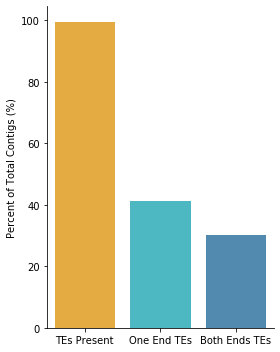

In [104]:
c_list = sns.color_palette("tab10").as_hex()
#TEs_trio = [c_list[i] for i in [2, -1, 0]] 
TEs_trio = ["#FFA500"] + [c_list[i] for i in [-1, 0]] 

plt.figure(figsize=(4,5))
sns.barplot(data = te_df_perc, palette = TEs_trio, alpha = 0.85)
sns.despine()
#plt.xlabel("")
plt.ylabel("Percent of Total Contigs (%)")
plt.tight_layout()
#plt.savefig('Thesis_images/TEs_by_contig.svg')

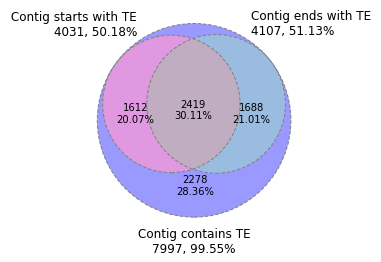

In [106]:
total = 8033 #I would like to replace with a function that gets that number
fig = plt.figure(figsize=(5,5))
venn_name1 = ' Contig starts with TE\n'+ str(len(set1)) + ", " + str(round((len(set1)/total) *100, 2)) + "%"
venn_name2 = 'Contig ends with TE \n'  + str(len(set2)) + ", " + str(round((len(set2)/total) *100, 2)) + "%"
venn_name3 = 'Contig contains TE\n'   + str(len(set3)) + ", " + str(round((len(set3)/total) *100, 2)) + "%"
v = venn3([set1, set2, set3], (venn_name1, venn_name2 , venn_name3),
         subset_label_formatter= lambda x: ( "\n"+str(x) + "\n" +str(round((x/total) *100, 2)) + "%"))
venn3_circles(subsets = [set1, set2, set3], linestyle='dashed', linewidth=1, color='grey')
plt.tight_layout()
plt.show()
#fig.savefig('temp.svg', transparent=True)

In [108]:
str(round((len(set3)/total) *100, 2))

'99.55'

In [109]:
strict = pd.concat([start_1, end_0[~end_0["query_contig"].duplicated()]], ignore_index=True)
len(strict[strict["query_contig"].duplicated()])

2419

In [110]:
len(strict[strict["query_contig"].duplicated()])/8033 *100

30.113282708826095

**TE Fragmentation Graphs - frequency**

Text(0, 0.5, 'number of TEs')

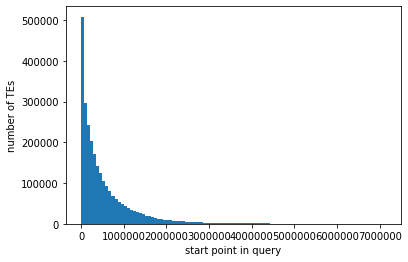

In [111]:
y = "q_start"
plt.hist(repeats[y], bins= 100)
plt.xlabel("start point in query")
plt.ylabel("number of TEs")

Text(0, 0.5, 'number of TEs')

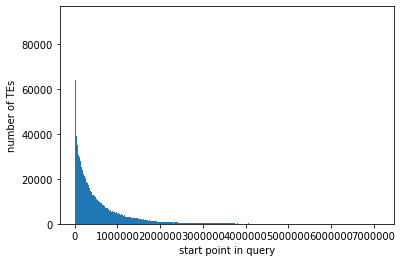

In [112]:
y = "q_start"
plt.hist(repeats[y], bins= 1000)
plt.xlabel("start point in query")
plt.ylabel("number of TEs")

Text(0, 0.5, 'number of TEs')

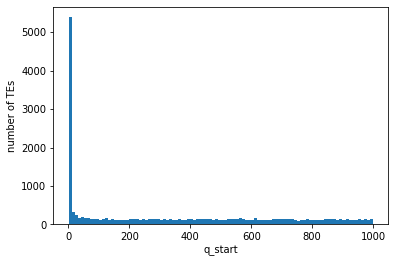

In [113]:
y = "q_start"
repeats_subset = repeats[repeats[y] < 1000]
plt.hist(repeats_subset[y], bins= 100)
plt.xlabel(y)
#plt.xlim(0,1000000)
plt.ylabel("number of TEs")

So as soon as we reduce the scale (or if we give them more bins) it becomes clear that there is a bias towards 1 as a start value. This is even clear when we just write out the counts.

In [114]:
for x in range(0,10):
    print(x, ":", len(repeats[repeats["q_start"] == x]))

0 : 0
1 : 4031
2 : 436
3 : 260
4 : 179
5 : 136
6 : 99
7 : 74
8 : 76
9 : 57


In [115]:
def leftover(string):
    return int(string[1:-1])
repeats["q_leftover"] = (repeats["(q_leftover)"].map(leftover))

Text(0, 0.5, 'number of TEs')

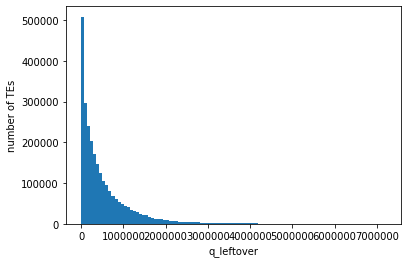

In [116]:
y = "q_leftover"
plt.hist(repeats[y], bins= 100)
plt.xlabel(y)
plt.ylabel("number of TEs")

Text(0, 0.5, 'number of TEs')

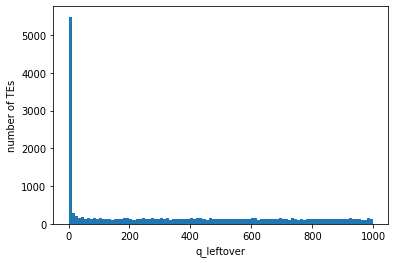

In [117]:
y = "q_leftover"
repeats_subset = repeats[repeats[y] < 1000]
plt.hist(repeats_subset[y], bins= 100)
plt.xlabel(y)
#plt.xlim(0,1000000)
plt.ylabel("number of TEs")

In [118]:
for x in range(0,10):
    print(x, ":", len(repeats[repeats[y] == x]))

0 : 4108
1 : 467
2 : 262
3 : 165
4 : 142
5 : 104
6 : 64
7 : 74
8 : 55
9 : 42


**TE Fragmentation Graphs - Normalised**

In [119]:
contigs_minimal = contigs.copy()
del contigs_minimal["start"]
contigs_minimal = contigs_minimal.set_index("id")
contigs_dict = contigs_minimal.to_dict()["end"]
repeats["q_contig_length"] = (repeats["query_contig"].map(contigs_dict))
repeats["q_start_prop"] = repeats["q_start"]/repeats["q_contig_length"]
repeats["q_leftover_prop"] = 1 - (repeats["q_leftover"]/repeats["q_contig_length"])

In [120]:
contigs_minimal = contigs.copy()
del contigs_minimal["start"]
contigs_minimal = contigs_minimal.set_index("id")
contigs_dict = contigs_minimal.to_dict()["end"]
repeats["q_contig_length"] = (repeats["query_contig"].map(contigs_dict))
repeats["q_start_prop"] = (repeats["q_start"]/repeats["q_contig_length"])*100
repeats["q_leftover_prop"] = 100 - (repeats["q_leftover"]/repeats["q_contig_length"])*100

Note above, the 1 - in the q_leftover_prop. This is so that the start and ends of the blow graphs are at different ends.

Text(0.5, 0, 'q_start_prop')

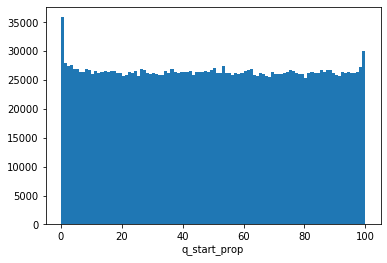

In [121]:
y = "q_start_prop"
plt.hist(repeats[y], bins= 100)
plt.xlabel(y)

Text(0.5, 0, 'q_leftover_prop')

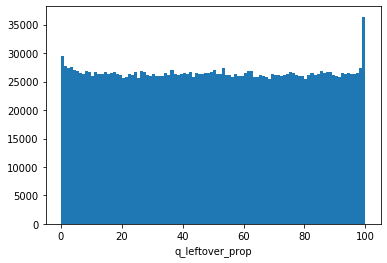

In [122]:
y = "q_leftover_prop"
plt.hist(repeats[y], bins= 100)
plt.xlabel(y)

Text(0.5, 0, 'q_leftover_prop')

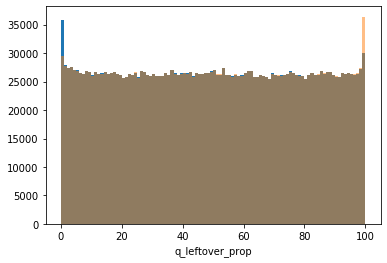

In [123]:
plt.hist(repeats["q_start_prop"], bins= 100)
plt.xlabel("q_start_prop")
plt.hist(repeats["q_leftover_prop"], bins= 100, alpha = 0.5)
plt.xlabel("q_leftover_prop")

Text(0.5, 0, 'q_leftover_prop')

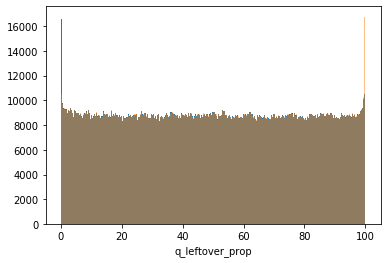

In [124]:
plt.hist(repeats["q_start_prop"], bins= 300)
plt.xlabel("q_start_prop")
plt.hist(repeats["q_leftover_prop"], bins= 300, alpha = 0.5)
plt.xlabel("q_leftover_prop")

In [125]:
kde_repeats = pd.DataFrame()
kde_repeats["Contig position for start of TE"] = repeats["q_start"]
kde_repeats["Contig left after TE"] = repeats["q_leftover"] + 1

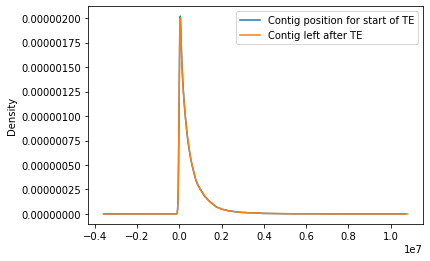

In [126]:
kde_repeats.plot.kde()

### Graphing LTR Age

In [127]:
time_header = "id	distance	time".split('\t')
all_time_tables = pd.read_csv(ltr_age_infn, sep = "\t", header = None, names = time_header)

Text(0.5, 1.0, 'LTRs time histogram')

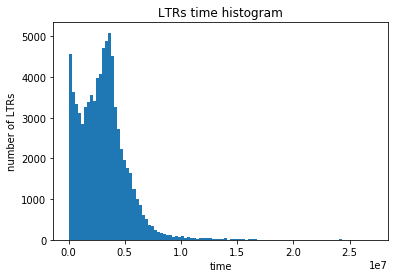

In [128]:
fig = plt.figure()
y = "time"
plt.hist(all_time_tables[y], bins= 100)
#plt.xlim(0,2500000000)
plt.xlabel("time")
plt.ylabel("number of LTRs")
plt.title("LTRs " + y + " histogram")
#fig.savefig('temp.svg', transparent=True)

In [129]:
#identifying the peak
#its the x value that corresponds to the max y value
#so for 5090.0, its three down 1 across
#:. 3519100
#y, x, _ = plt.hist(all_time_tables["time"], bins= 100)
#print(y.max())
#y, x

In [130]:
print(all_time_tables.time.mean())
print(all_time_tables.time.median())

3073159.5990063874
2990000.0000000005


In [131]:
all_time_tables[(all_time_tables["time"] !=0) & (all_time_tables["distance"] < 0.03)]

,id,distance,time
25412,tig00018289_008,0.02,10000.0
46006,hap_tig00014204_REPEAT_016,0.02,10000.0


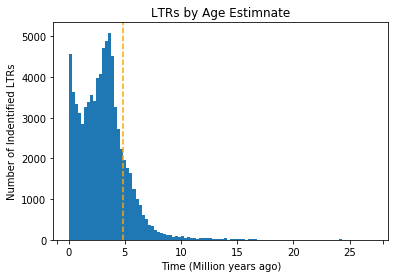

In [132]:
fig = plt.figure()
y = "time"
plt.hist(all_time_tables[y], bins= 100)
plt.xticks([-1000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 28000000.], [None, "0", "5", "10", "15", "20",
        "25", None])
plt.xlabel("Time (Million years ago)")
plt.ylabel("Number of Indentified LTRs")
plt.title("LTRs by Age Estimnate")
plt.axvline(x=4800000, color='orange', linestyle='dashed')

#fig.savefig('temp_rescale.png', transparent=True)

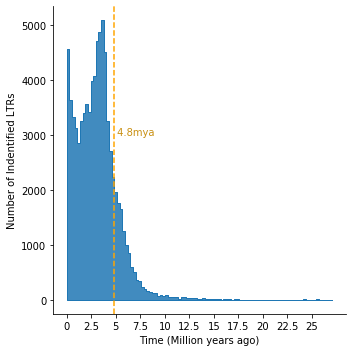

In [133]:
g = sns.displot(data = all_time_tables, x="time", bins=100, 
            element="step", color = sns.color_palette("tab10").as_hex()[0],
               alpha = 0.85)
plt.xlabel("Time (Million years ago)")
plt.ylabel("Number of Indentified LTRs")
plt.xticks(list(range(0,26000000, 2500000)), 
           [int(num) if float(num).is_integer() else num for num in np.arange(0,26, 2.5)])
g.ax.text(4800000 , 3000, " 4.8mya", color='#C99013')
plt.axvline(x=4800000, color='orange', linestyle='dashed')
#g.savefig('Thesis_images/LTRS_with48.svg', transparent=True)

## Stats on LTR identification

In [134]:
all_scndf = pd.read_csv(all_scndf_infn, sep='\t')
all_scndf_since = all_scndf[all_scndf["time"] < (0.48 * (10**7))]

To get bp lengths without the issue of overlaps I want to use bedtools merge. That needs a bed file of just contig, start, stop. 

In [135]:
bed_head = ["contig", "ret_start", "ret_end"]

all_scndf_merged = pd.read_csv(ltr_age_overlaps, sep='\t', header=None, names = bed_head)
all_scndf_merged["len"] = all_scndf_merged["ret_end"] - all_scndf_merged["ret_start"]

since_scndf_merged = pd.read_csv(ltr_age_overlaps_48, sep='\t', header=None, names = bed_head)
since_scndf_merged["len"] = since_scndf_merged["ret_end"] - since_scndf_merged["ret_start"]

In [140]:
length_all_bp = all_scndf_merged.len.sum()
length_since_bp = since_scndf_merged.len.sum()
length_total_bp = 12891157 #this was done with code but involved another file

length_all_con = len(all_scndf["contig"].unique())
length_since_con = len(all_scndf_since["contig"].unique())
length_total_con = int(8033)

num_all =len(all_scndf)
num_since = len(all_scndf_since)
num_total = None

In [142]:
ltr_to_be = {"columns":["bp_length", "contigs", "LTR_number"], "total": [length_total_bp, length_total_con, num_total], "all": [length_all_bp, length_all_con, num_all], "since": [length_since_bp, length_since_con, num_since]}
ltr_stats = pd.DataFrame.from_dict(ltr_to_be, dtype=object).set_index("columns")
ltr_stats["since/all"] = ltr_stats["since"] / ltr_stats["all"]
ltr_stats["since/total"] = ltr_stats["since"] / ltr_stats["total"]
ltr_stats["all/total"] = ltr_stats["all"] / ltr_stats["total"]
ltr_stats

,total,all,since,since/all,since/total,all/total
columns,,,,,,
bp_length,12891157,236816760,225307988,0.951402,17.4777,18.3705
contigs,8033,3637,3538,0.97278,0.440433,0.452757
LTR_number,None,78904,65910,0.835319,NaN,NaN


In [143]:
rm_TEs = len(repeats)
rm_LTRs = len(repeats[repeats["repeat_family"].str.contains("LTR")])
RM_contigs = len(repeats["query_contig"].unique())

In [144]:
ltr_vs_to_be = {"columns":["TEs", "LTRs", "contigs"], "total": [None, None, length_total_con], "ltr_finder": [num_all, num_all, length_all_con], "RM": [rm_TEs, rm_LTRs, RM_contigs]}
ltr_vs_rm = pd.DataFrame.from_dict(ltr_vs_to_be, dtype=object).set_index("columns")
ltr_vs_rm["ltr_finder/RM"] = ltr_vs_rm["ltr_finder"] / ltr_vs_rm["RM"]
ltr_vs_rm["ltr_finder/total"] = ltr_vs_rm["ltr_finder"] / ltr_vs_rm["total"]
ltr_vs_rm["RM/total"] = ltr_vs_rm["RM"] / ltr_vs_rm["total"]
ltr_vs_rm

,total,ltr_finder,RM,ltr_finder/RM,ltr_finder/total,RM/total
columns,,,,,,
TEs,None,78904,2650244,0.0297724,NaN,NaN
LTRs,None,78904,797711,0.098913,NaN,NaN
contigs,8033,3637,7997,0.454796,0.452757,0.995518


## Chapter 4 - Gene Annotation

In [145]:
#BRAKER2 results
brakerinfn = "/home/jemimah/analysis/v3/braker2/20200709_real/braker.gtf.reformatted"

#Protien BUSCOs
protien_busco_infn = "/home/jemimah/analysis/v3/busco/20200713/Walli.v3.braker2.embryophyta_odb10/short_summary.specific.embryophyta_odb10.Walli.v3.braker2.embryophyta_odb10.txt"

#Protien comparison to other species - needs altering at location

#Orthofinder
ortho_path = "/home/jemimah/analysis/v3/orthofinder/20200911/Results_Sep11/Comparative_Genomics_Statistics/Statistics_PerSpecies.tsv"
ortho_count = "/home/jemimah/analysis/v3/orthofinder/20200911/Results_Sep11/Orthogroups/Orthogroups.GeneCount.tsv"

#GO tools
go_infn = "/home/jemimah/analysis/v3/gotools/20200921/output.gotools"\

### Braker2 Results

In [146]:
braker_df = pd.read_csv(brakerinfn, sep = '\t')
braker_df

,seqname,source,feature,start,end,score,strand,frame,transcript_id,gene_id
0,hap_tig00001573_HAPLOTIG,AUGUSTUS,start_codon,99288,99290,.,+,0,file_1_file_1_g47449.t1,file_1_file_1_g47449
1,hap_tig00001573_HAPLOTIG,AUGUSTUS,CDS,99288,99456,1,+,0,file_1_file_1_g47449.t1,file_1_file_1_g47449
2,hap_tig00001573_HAPLOTIG,AUGUSTUS,exon,99288,99456,.,+,.,file_1_file_1_g47449.t1,file_1_file_1_g47449
3,hap_tig00001573_HAPLOTIG,AUGUSTUS,intron,99457,99554,1,+,.,file_1_file_1_g47449.t1,file_1_file_1_g47449
4,hap_tig00001573_HAPLOTIG,AUGUSTUS,CDS,99555,99874,1,+,2,file_1_file_1_g47449.t1,file_1_file_1_g47449
...,...,...,...,...,...,...,...,...,...,...
1351060,tig00015659,AUGUSTUS,CDS,204361,204945,1,-,0,file_1_file_1_g58256.t1,file_1_file_1_g58256
1351061,tig00015659,AUGUSTUS,gene,203891,204945,0.78,-,.,NaN,g58256
1351062,tig00015659,AUGUSTUS,transcript,203891,204945,0.78,-,.,g58256.t1,NaN
1351063,tig00015659,AUGUSTUS,exon,204361,204945,.,-,.,file_1_file_1_g58256.t1,file_1_file_1_g58256


In [147]:
braker_genes = braker_df[braker_df["feature"] == "gene"]
tot = len(braker_genes)
alt = len(braker_genes[braker_genes["seqname"].str.contains("hap_")])
pri = len(braker_genes[~braker_genes["seqname"].str.contains("hap_")])

In [148]:
print("braker.gtf\nwhole:", tot, "\nprimary:", pri, "\nalternate:", alt)

braker.gtf
whole: 87730 
primary: 49078 
alternate: 38652


### Protien BUSCOs

In [149]:
#%%bash
#cd /home/jemimah/analysis/v3/busco/20200713/Walli.v3.braker2.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/
#echo prot
#for file in *.faa; do grep -c ">" $file; done | sort | uniq -c

In [153]:
prot_busco_header = ["v3_braker","category"]
protien_busco_df = pd.read_csv(protien_busco_infn, sep = '\t', header = None, skiprows = 8, usecols = [1, 2], names=prot_busco_header)
protien_busco_df = protien_busco_df.set_index("category")

td_prot = !for faa in /home/jemimah/analysis/v3/busco/20200713/Walli.v3.braker2.embryophyta_odb10/run_embryophyta_odb10/busco_sequences/multi_copy_busco_sequences/*.faa; do grep -c ">" $faa; done | sort | uniq -c | head -1 
td_prot = int(td_prot[0].split()[0])
protien_busco_df.loc['Complete and two copy BUSCOs'] = td_prot
protien_busco_df = protien_busco_df.reindex(index = busco_heading)

In [155]:
df_em_v3_only["v3_pd_braker"] = protien_busco_df["v3_braker"]
comparison = df_em_v3_only[["v3pd", "v3_pd_braker"]].copy()
comparison

,v3pd,v3_pd_braker
category,,
Total BUSCO groups searched,1614,1614
Complete BUSCOs (C),1568,1544
Complete and single-copy BUSCOs (S),182,68
Complete and duplicated BUSCOs (D),1386,1476
Complete and two copy BUSCOs,1308,1282
Fragmented BUSCOs (F),5,44
Missing BUSCOs (M),41,26


In [156]:
to_percents(comparison)

,v3pd,v3_pd_braker
category,,
Total BUSCO groups searched,1614.00,1614.00
Complete BUSCOs (C)%,97.15,95.66
Complete and single-copy BUSCOs (S)%,11.28,4.21
Complete and duplicated BUSCOs (D)%,85.87,91.45
Complete and two copy BUSCOs%,81.04,79.43
Fragmented BUSCOs (F)%,0.31,2.73
Missing BUSCOs (M)%,2.54,1.61


In [158]:
for x in comparison.columns:
    print(x)
    print(comparison.loc["Complete and duplicated BUSCOs (D)", x] - comparison.loc["Complete and two copy BUSCOs", x])

v3pd
78
v3_pd_braker
194


In [160]:
comp_diff = df_em_v3_only.loc["Complete BUSCOs (C)", "v3pd"] - df_em_v3_only.loc["Complete BUSCOs (C)", "v3_pd_braker"]
frag_diff = df_em_v3_only.loc["Fragmented BUSCOs (F)", "v3pd"] - df_em_v3_only.loc["Fragmented BUSCOs (F)", "v3_pd_braker"]
miss_diff = df_em_v3_only.loc["Missing BUSCOs (M)", "v3pd"] - df_em_v3_only.loc["Missing BUSCOs (M)", "v3_pd_braker"]
-frag_diff == comp_diff + miss_diff

True

### Protien QC - Length & pi

In [161]:
all_species = !ls /home/jemimah/databases/orthofinder_input/fourth_run_20200911/
all_species

['A_chinensis.fa',
 'A_thaliana.fa',
 'D_carota.fa',
 'H_annuus.fa',
 'L_sativa.fa',
 'S_lycopersicum.fa',
 'S_tuberosum.fa',
 'W_ceracea.fa']

In [162]:
species_dict = {}
for species in all_species:
    proteins = []
    file = "/home/jemimah/databases/orthofinder_input/fourth_run_20200911/" + species
    for seq in SeqIO.parse(file, 'fasta'):
        proteins.append(seq)   

    protein_length = []
    protein_pi_values = []
    ID_list = []
    for protein in proteins:
        protein_length.append(len(protein))
        tmp_protein = IP.IsoelectricPoint(protein.seq) #generate a Isoelectric point object to be able to calcuate pi values
        tmp_protein_pi = tmp_protein.pi() #calculate pi value
        protein_pi_values.append(tmp_protein_pi)
        ID_list.append(protein.id)


    file_dict = {}
    file_dict['protein_ID'] = ID_list
    file_dict['protein_length'] = protein_length
    file_dict['protein_pi_value'] = protein_pi_values
    file_df = pd.DataFrame.from_dict(file_dict)
#    species_name = file.split("/")[-1]
    species_name = species.split(".")[0]
    species_dict[species_name] = file_df

In [163]:
pairs = pd.read_csv("~/analysis/v3/braker2/20200709_real/pairs.tsv", sep="\t").set_index("transcript_id")
short_pairs_dict = pairs.to_dict()["seq_short"]

In [164]:
some_species = all_species[1:3] + [all_species[4]] + [all_species[3]]+ [all_species[-1]]
temp_species = []
for x in some_species:
    temp_species += [((x.split("."))[0]).replace("_", ". ")]
some_species = temp_species # + [name]
some_species.reverse()

In [165]:
some_species.reverse()

In [166]:
#dataframe will drop values from df which are added later if they have fewer rows
#so I made sure H. annuus is first
pi_df = pd.DataFrame()
for y in ['H. annuus','W. ceracea',  'L. sativa', 'D. carota', 'A. thaliana']:
    x = y.replace(". ","_")
    pi_df[y] = species_dict[x]["protein_pi_value"]
    print(y, len(species_dict[x]["protein_pi_value"]))
pi_df = pi_df[['W. ceracea', 'H. annuus', 'L. sativa', 'D. carota', 'A. thaliana']]

H. annuus 52243
W. ceracea 49326
L. sativa 38910
D. carota 32113
A. thaliana 27654


In [167]:
#sns.displot(pi_df, kind="kde")

In [168]:
c_list = sns.color_palette("tab10").as_hex()
protein_palette = [c_list[i] for i in [1, -2, 2,-1,0]] 

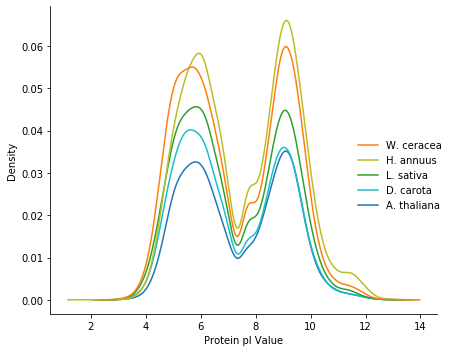

In [169]:
sns.displot(pi_df, kind="kde", palette = protein_palette)
plt.xlabel("Protein pI Value")
plt.tight_layout()
#plt.savefig('Thesis_images/pI_Values.svg')

In [170]:
length_df = pd.DataFrame()
for y in ['H. annuus','W. ceracea',  'L. sativa', 'D. carota', 'A. thaliana']:
    x = y.replace(". ","_")
    length_df[y] = species_dict[x]["protein_length"]
length_df = length_df[['W. ceracea', 'H. annuus', 'L. sativa', 'D. carota', 'A. thaliana']]

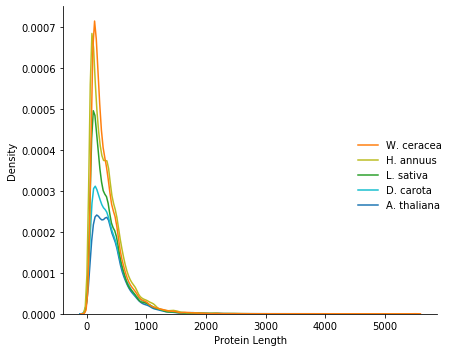

In [171]:
sns.displot(length_df, kind="kde", palette = protein_palette)
plt.xlabel("Protein Length")
plt.tight_layout()
#plt.savefig('temp.svg')

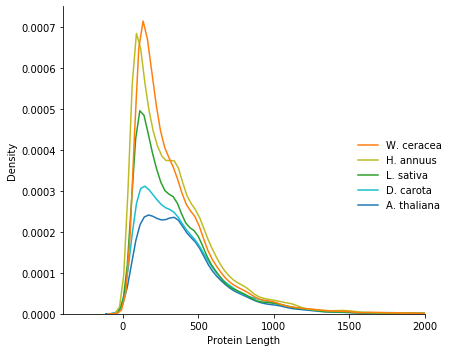

In [172]:
sns.displot(length_df, kind="kde", palette = protein_palette)
plt.xlim(None,2000)
plt.xlabel("Protein Length")
plt.tight_layout()
#plt.savefig('Thesis_images/protein_lengths.svg')

### Orthofinder table

In [173]:
ortho_order = "A_thaliana	S_lycopersicum	S_tuberosum	A_chinensis	D_carota	L_sativa	H_annuus	W_ceracea".split("\t")
otho_df = pd.read_csv(ortho_path, sep = "\t", index_col = 0 )
otho_df = otho_df[ortho_order].head(10)

In [174]:
total = !wc -l ~/analysis/v3/orthofinder/20200911/Results_Sep11/Comparative_Genomics_Statistics/Duplications_per_Orthogroup.tsv
total = int(total[0].split()[0]) -1

In [175]:
#% of all 
ss_percent = []
for x in otho_df.columns:
    ss_percent += [round((int(otho_df.loc["Number of species-specific orthogroups", x])/total *100), 1)]
#ss_percent

In [176]:
otho_df_graphable = otho_df.transpose()
new_ortho_columns = []
for x in list(otho_df_graphable.columns):
    new_ortho_columns += [x.replace("gene", "protein")]
new_ortho_columns

for x in range(0, len(new_ortho_columns)):
    otho_df_graphable[new_ortho_columns[x]] = otho_df_graphable[list(otho_df_graphable.columns)[x]].astype(float)
otho_df_graphable = otho_df_graphable[new_ortho_columns]
ortho_species = [x.replace("_", ". ") for x in ortho_order]
#otho_df_graphable["Percentage of species-specific orthogroups"] = np.asarray(("4.7	2.5	3.1	2.5	5.6	6.3	10.8	12.8").split()).astype(float)
otho_df_graphable["Percentage of species-specific orthogroups"] = ss_percent
otho_df_graphable["Species"] = ortho_species
#otho_df_graphable

In [177]:
otho_df_graphable_number = otho_df_graphable[[i for i in list(otho_df_graphable.columns) if 'umber' in i] + ["Species"]] 
otho_df_graphable_percent = otho_df_graphable[[i for i in list(otho_df_graphable.columns) if 'centage' in i] + ["Species"]] 
number_order = list(otho_df_graphable_percent.columns)[:3] + \
              [list(otho_df_graphable_percent.columns)[4]] + \
              [list(otho_df_graphable_percent.columns)[3]] + \
              [list(otho_df_graphable_percent.columns)[-1]]
otho_df_graphable_percent = otho_df_graphable_percent[number_order]
otho_df_graphable = otho_df_graphable[[i for i in list(otho_df_graphable.columns) if 'umber' in i] + [i for i in list(otho_df_graphable.columns) if 'centage' in i] +["Species"]]

In [178]:
old_names = list(otho_df_graphable.columns)
new_names = ["Total Proteins", "Proteins in Orthogroups", "Proteins Unassigned", 
             "Orthogroups\nContaining Species", "Orthogroups Only\nContaining Species",
             "Proteins in Species-\nSpecific Orthogroups",
             "Proteins in Orthogroups", "Proteins Unassigned", 
             "Orthogroups\nContaining Species","Proteins in Species-\nSpecific Orthogroups",
             "Orthogroups Only\nContaining Species",
             "Species"]
name_change = dict(zip(old_names, new_names))
otho_df_graphable_number.rename(columns=name_change, inplace = True)
otho_df_graphable_percent.rename(columns=name_change, inplace = True)

In [179]:
c_list = sns.color_palette("viridis", 7).as_hex()
ortho_palette =  c_list + ["#FFA500"] 

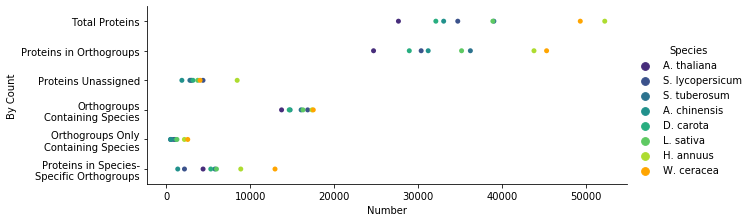

In [180]:
otho_df_graphable_melted = otho_df_graphable_number.melt(id_vars="Species")
otho_df_graphable_melted["Number"] = otho_df_graphable_melted["value"]
otho_df_graphable_melted["By Count"] = otho_df_graphable_melted["variable"]
sns.catplot(data=otho_df_graphable_melted, x="Number", y = "By Count",
            hue = "Species", jitter=False, height=3, aspect=3, palette = ortho_palette)
#plt.savefig('Thesis_images/ortho_table_count.svg')

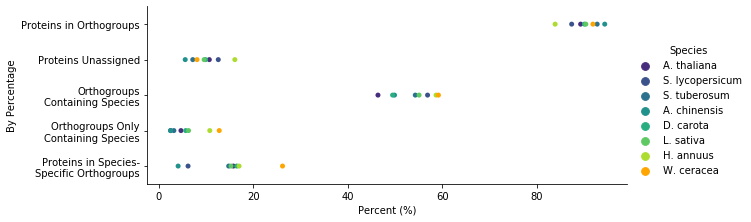

In [181]:
otho_df_graphable_melted = otho_df_graphable_percent.melt(id_vars="Species")
otho_df_graphable_melted["Percent (%)"] = otho_df_graphable_melted["value"]
otho_df_graphable_melted["By Percentage"] = otho_df_graphable_melted["variable"]
g = sns.catplot(data=otho_df_graphable_melted, x="Percent (%)", y = "By Percentage",
            hue = "Species", jitter=False, height=3, aspect=3, palette = ortho_palette)
#plt.savefig('Thesis_images/ortho_table_percent.svg')

In [182]:
ortho_count_df = pd.read_csv(ortho_count, sep = '\t', index_col = "Orthogroup")
ortho_count_df = ortho_count_df[ortho_order + ["Total"]]

In [183]:
A_thaliana_og = set(ortho_count_df[ortho_count_df["A_thaliana"] != 0].index)
S_lycopersicum_og = set(ortho_count_df[ortho_count_df["S_lycopersicum"] != 0].index)
S_tuberosum_og = set(ortho_count_df[ortho_count_df["S_tuberosum"] != 0].index)
A_chinensis_og = set(ortho_count_df[ortho_count_df["A_chinensis"] != 0].index)
D_carota_og = set(ortho_count_df[ortho_count_df["D_carota"] != 0].index)
L_sativa_og = set(ortho_count_df[ortho_count_df["L_sativa"] != 0].index)
H_annuus_og = set(ortho_count_df[ortho_count_df["H_annuus"] != 0].index)
W_ceracea_og = set(ortho_count_df[ortho_count_df["W_ceracea"] != 0].index)

In [184]:
Solanum_og = S_lycopersicum_og | S_tuberosum_og
Lamiids_Ericales_og =  Solanum_og | A_chinensis_og
Campanulids_og = D_carota_og | L_sativa_og | H_annuus_og | W_ceracea_og
Asterids_og = Solanum_og | Campanulids_og | A_chinensis_og

In [185]:
W_ceracea_only_og = set(ortho_count_df[(ortho_count_df["W_ceracea"] != 0) &
                                       (ortho_count_df["W_ceracea"] == ortho_count_df["Total"])].index)
D_carota_only_og = set(ortho_count_df[(ortho_count_df["D_carota"] != 0) &
                                       (ortho_count_df["D_carota"] == ortho_count_df["Total"])].index)
H_annuus_only_og = set(ortho_count_df[(ortho_count_df["H_annuus"] != 0) &
                                       (ortho_count_df["H_annuus"] == ortho_count_df["Total"])].index)

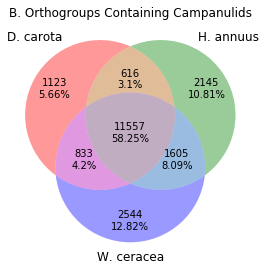

In [186]:
#orthogroups containing each species, 
#with single species = only that species
#at multi species = at least those two species
fig = plt.figure(figsize=(4,4))
v = venn3_unweighted([D_carota_og, H_annuus_og, W_ceracea_og], 
      ('D. carota', 'H. annuus', 'W. ceracea'),
        subset_label_formatter= lambda x: ( str(x) + "\n" +str(round((x/total) *100, 2)) + "%"))
v.get_label_by_id('100').set_text(str(len(D_carota_only_og)) + "\n" +str(round((len(D_carota_only_og)/total) *100, 2)) + "%")
v.get_label_by_id('010').set_text(str(len(H_annuus_only_og)) + "\n" +str(round((len(H_annuus_only_og)/total) *100, 2)) + "%")
v.get_label_by_id('001').set_text(str(len(W_ceracea_only_og)) + "\n" +str(round((len(W_ceracea_only_og)/total) *100, 2)) + "%")

plt.title("B. Orthogroups Containing Campanulids")
plt.tight_layout()

plt.show()
#fig.savefig('temp.svg', transparent=True)

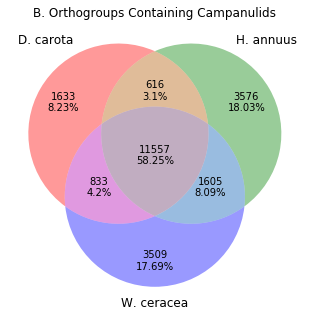

In [187]:
#orthogroups containing each species, 
#with single species = that species and not the other two
fig = plt.figure(figsize=(4.5,4.5))
venn3_unweighted([D_carota_og, H_annuus_og, W_ceracea_og], 
      ('D. carota', 'H. annuus', 'W. ceracea'),
        subset_label_formatter= lambda x: ( str(x) + "\n" +str(round((x/total) *100, 2)) + "%"))

plt.title("B. Orthogroups Containing Campanulids")
plt.tight_layout()

plt.show()

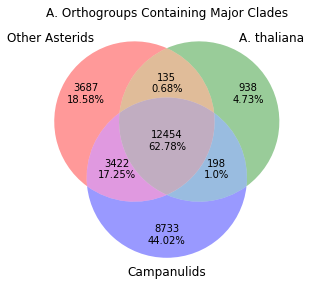

In [188]:
#orthogroups containg memebers of each clade
fig = plt.figure(figsize=(4.5,4.5))
venn3_unweighted([Lamiids_Ericales_og, A_thaliana_og, Campanulids_og], 
      ('Other Asterids',  'A. thaliana', 'Campanulids'),
        subset_label_formatter= lambda x: ( str(x) + "\n" +str(round((x/total) *100, 2)) + "%"))
plt.title("A. Orthogroups Containing Major Clades")
plt.tight_layout()
plt.show()
#fig.savefig('temp.svg', transparent=True)

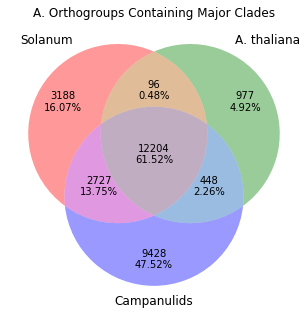

In [189]:
#orthogroups containg memebers of each clade, without kiwi
fig = plt.figure(figsize=(4.5,4.5))
venn3_unweighted([Solanum_og, A_thaliana_og, Campanulids_og], 
      ('Solanum',  'A. thaliana', 'Campanulids'),
        subset_label_formatter= lambda x: ( str(x) + "\n" +str(round((x/total) *100, 2)) + "%"))
plt.title("A. Orthogroups Containing Major Clades")
plt.tight_layout()
plt.show()
#fig.savefig('temp.svg', transparent=True)

### GO Tools

In [190]:
go_header = "GO      NS      enrichment      name    ratio_in_study  ratio_in_pop    p_uncorrected   depth   study_count     p_bonferroni    p_sidak p_holm  p_fdr_bh        study_items".split()
go_df = pd.read_csv(go_infn, sep = '\t', header = None, 
                             names = go_header, skiprows = 87)
go_BP_df = go_df[go_df["NS"] == "BP"]
go_MF_df = go_df[go_df["NS"] == "MF"]
go_CC_df = go_df[go_df["NS"] == "CC"]
go_e_df = go_df[go_df["enrichment"] == "e"]
go_p_df = go_df[go_df["enrichment"] == "p"]

In [191]:
go_e_df

,GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_bonferroni,p_sidak,p_holm,p_fdr_bh,study_items
0,.GO:0040011,BP,e,locomotion,9/235,9/429,0.00485,1,9,1.0,1.0,1.0,0.256,"IPR000673, IPR001029, IPR001492, IPR002545, IP..."
1,...GO:0006082,BP,e,organic acid metabolic process,12/235,13/429,0.00808,3,12,1.0,1.0,1.0,0.276,"IPR000821, IPR003664, IPR004452, IPR004472, IP..."
2,.....GO:0019752,BP,e,carboxylic acid metabolic process,12/235,13/429,0.00808,5,12,1.0,1.0,1.0,0.276,"IPR000821, IPR003664, IPR004452, IPR004472, IP..."
3,....GO:0043436,BP,e,oxoacid metabolic process,12/235,13/429,0.00808,4,12,1.0,1.0,1.0,0.276,"IPR000821, IPR003664, IPR004452, IPR004472, IP..."
4,...GO:0005975,BP,e,carbohydrate metabolic process,14/235,16/429,0.00870,3,14,1.0,1.0,1.0,0.276,"IPR000254, IPR002105, IPR002594, IPR003610, IP..."
5,.....GO:0046394,BP,e,carboxylic acid biosynthetic process,8/235,8/429,0.00929,6,8,1.0,1.0,1.0,0.276,"IPR003664, IPR004472, IPR004620, IPR012281, IP..."
6,....GO:0016053,BP,e,organic acid biosynthetic process,8/235,8/429,0.00929,4,8,1.0,1.0,1.0,0.276,"IPR003664, IPR004472, IPR004620, IPR012281, IP..."
7,..GO:0050789,BP,e,regulation of biological process,36/235,51/429,0.01660,2,36,1.0,1.0,1.0,0.409,"IPR000524, IPR000673, IPR000792, IPR001138, IP..."
8,..GO:0042330,BP,e,taxis,7/235,7/429,0.01780,2,7,1.0,1.0,1.0,0.411,"IPR000673, IPR002545, IPR004105, IPR005659, IP..."
9,...GO:0006935,BP,e,chemotaxis,7/235,7/429,0.01780,3,7,1.0,1.0,1.0,0.411,"IPR000673, IPR002545, IPR004105, IPR005659, IP..."
